# Problem Statement

- Understandind the relation between the variousfactor like bmi, number of cgildren or smoker affecting the hospitalization charges.
- Predictingnthenhospitalization by understanding pattern from other parameters.

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
ins_data = pd.read_csv("D:/Data Analyst/Resources/DATASET/insurance.csv")

In [3]:
ins_data.head()  ## Top 5 rows

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
ins_data.shape  ## Total no. of rows and columns

(1338, 7)

In [7]:
ins_data.describe()  ## statistical data 

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


From the above table, we can say -
- Mean age is around 39.
- Mean BMI is 30.66.
- Max number of children is 5.
- Mean cahrges is 13k but the 50% is 9k, so there is a hint of outlier.

In [14]:
ins_data.describe(include = 'all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [8]:
ins_data.isnull().sum()  ## to check any null values present in the data

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [13]:
ins_data.info()  ## to check the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
#Defining a function
#frequency of unique entries in each columns with their names

def frequency_each_item(X,Y):
    for i in Y:
        print("Frequency of each category for-->", i)
        print(X[i].value_counts())
        print("-"*60)

In [12]:
#Frequency of unique entries in each columns with their names

category = ["sex", "smoker", "region"]

frequency_each_item(ins_data, category)

Frequency of each category for--> sex
sex
male      676
female    662
Name: count, dtype: int64
------------------------------------------------------------
Frequency of each category for--> smoker
smoker
no     1064
yes     274
Name: count, dtype: int64
------------------------------------------------------------
Frequency of each category for--> region
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64
------------------------------------------------------------


- There are 676 Male and 662 are Females.

## Non-Graphical Analysis

In [16]:
ins_data['age'].value_counts().sort_values(ascending = False)

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
24    28
23    28
27    28
28    28
25    28
54    28
26    28
21    28
53    28
49    28
22    28
42    27
40    27
31    27
44    27
30    27
41    27
43    27
29    27
32    26
33    26
56    26
34    26
55    26
57    26
38    25
39    25
35    25
59    25
36    25
58    25
37    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

- Most common ages for the smokers that we can see is 18-20 and 45-52.

In [20]:
ins_data.groupby("sex")["smoker"].value_counts()

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
Name: count, dtype: int64

- Out of 676 Male, 159 are smoker.
- Out of 662 Female, 115 are smoker.
- 20% people are smoker in data.
- 42% Female And 58% Male are smoker in data.

In [30]:
ins_data.groupby(["sex",'smoker'])['age'].mean()

sex     smoker
female  no        39.691042
        yes       38.608696
male    no        39.061896
        yes       38.446541
Name: age, dtype: float64

In [32]:
ins_data.groupby(["sex","smoker"]).agg({"age":["mean"]})  ## mean age of smoker based on sex

age
                    mean
sex    smoker           
female no      39.691042
       yes     38.608696
male   no      39.061896
       yes     38.446541

- Average age of both Male and Female is 38

In [33]:
ins_data.groupby(["region","smoker"]).agg({"age":["count"]})  ## region wise smoker

age
                 count
region    smoker      
northeast no       257
          yes       67
northwest no       267
          yes       58
southeast no       273
          yes       91
southwest no       267
          yes       58

# Univariate Analysis

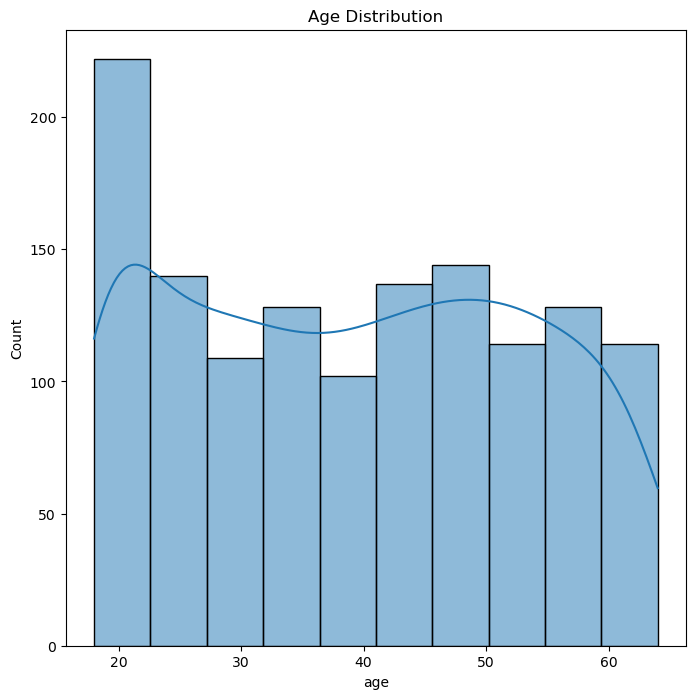

In [35]:
plt.figure(figsize = (8,8))
sns.histplot(ins_data["age"],kde = True,bins = 10)
plt.title("Age Distribution")
plt.show()

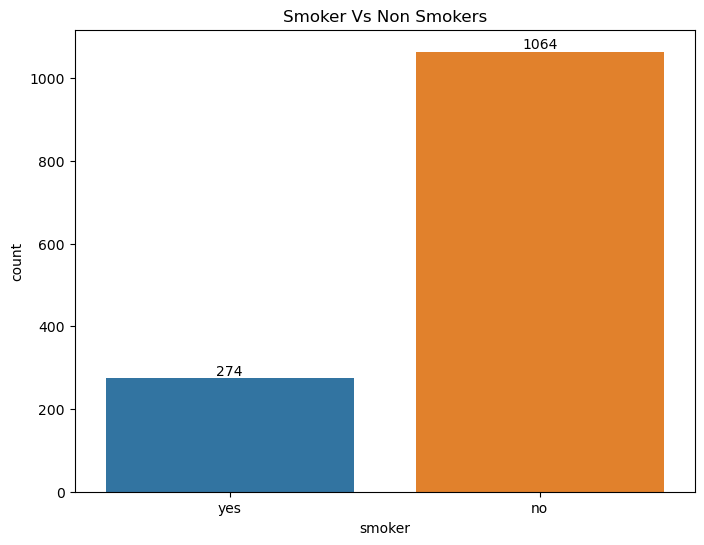

In [40]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = ins_data, x = "smoker")
for var in ax.containers:
    ax.bar_label(var)
    
    
plt.title("Smoker Vs Non Smokers")
plt.show()

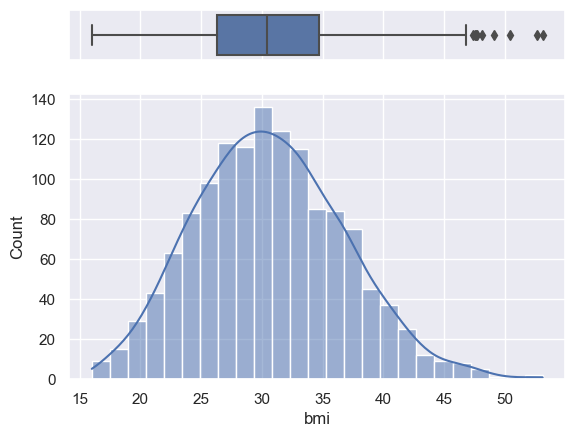

In [47]:
sns.set(style = 'darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios" : (.15, .85)})
sns.boxplot(data = ins_data, x = "bmi", ax = ax_box)
sns.histplot(data = ins_data, x = "bmi", ax = ax_hist, kde = True)
ax_box.set(xlabel = "")
plt.show()

## Treating Outliers

In [48]:
Q1 = ins_data["bmi"].quantile(0.25)
Q3 = ins_data["bmi"].quantile(0.75)
IQR =Q3 - Q1

lower_limit = Q1 - (1.5 *IQR)
upper_limit = Q3 + (1.5 * IQR)

In [50]:
Q1,Q3,IQR,lower_limit,upper_limit

(26.3, 34.7, 8.400000000000002, 13.699999999999998, 47.300000000000004)

In [54]:
ins_data_outlier = ins_data[(ins_data["bmi"] <= lower_limit) | (ins_data["bmi"] >= upper_limit)]

In [55]:
ins_data_outlier

,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


In [52]:
ins_data_outlier_free = ins_data[(ins_data["bmi"] > lower_limit) & (ins_data["bmi"] < upper_limit)]

In [53]:
ins_data_outlier_free

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


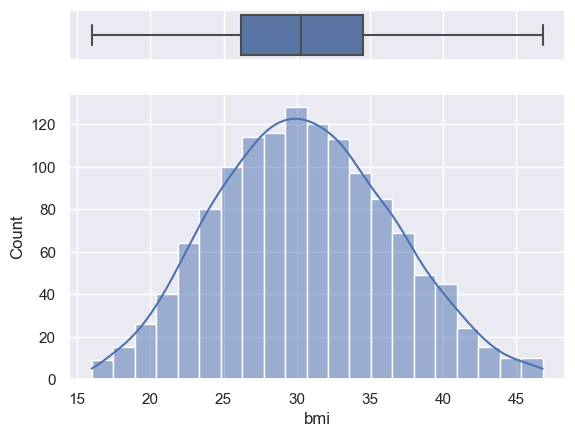

In [59]:
sns.set(style = 'darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios" : (.15, .85)})
sns.boxplot(data = ins_data_outlier_free, x = "bmi", ax = ax_box)
sns.histplot(data = ins_data_outlier_free, x = "bmi", ax = ax_hist, kde = True)
ax_box.set(xlabel = "")
plt.show()

From the above graph, we can say that -
- Average BMI is around 30.
- 75% Of BMI is under 35.
- 25% of BMI is under is 26.

In [60]:
Q1_outlier_free = ins_data_outlier_free["bmi"].quantile(0.25)
Q3_outlier_free = ins_data_outlier_free["bmi"].quantile(0.75)
IQR_outlier_free =Q3 - Q1

lower_limit_outlier_free = Q1 - (1.5 *IQR)
upper_limit_outlier_free = Q3 + (1.5 * IQR)

#### Mean get drastically affected by outliers

In [61]:
Q1_outlier_free, Q3_outlier_free, IQR_outlier_free, lower_limit_outlier_free, upper_limit_outlier_free

(26.2, 34.5, 8.400000000000002, 13.699999999999998, 47.300000000000004)

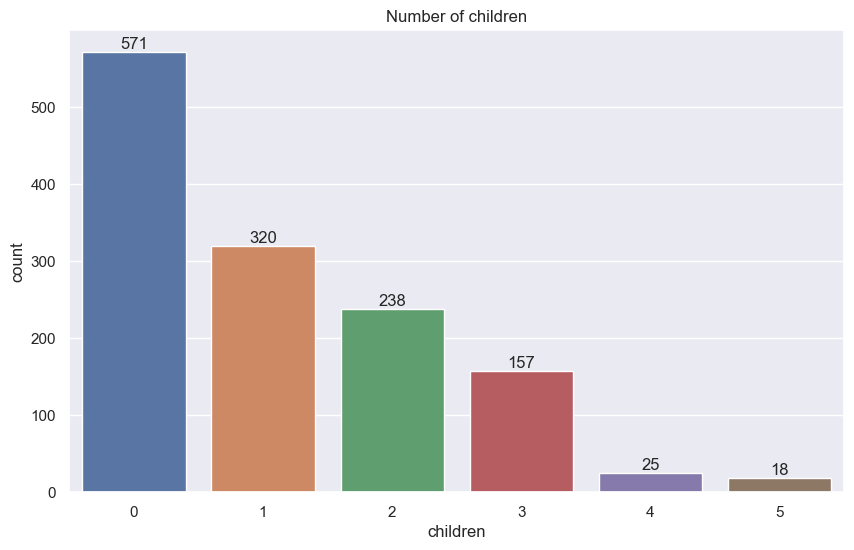

In [62]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = ins_data_outlier_free, x = "children")
for i in ax.containers:
    ax.bar_label(i)
    
plt.title("Number of children")
plt.show()

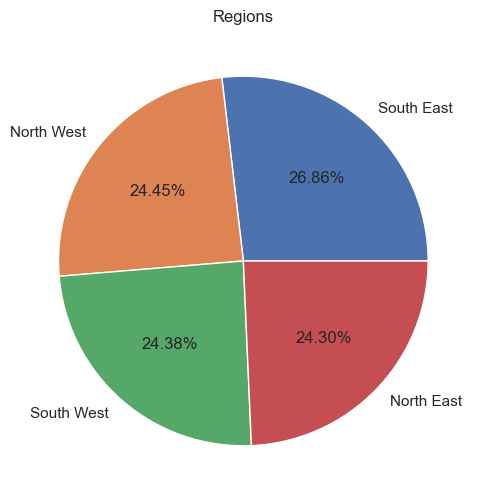

In [67]:
type_value_count = ins_data_outlier_free['region'].value_counts(normalize = True) * 100
plt.figure(figsize = (8,6))
plt.pie(type_value_count, labels = ["South East", "North West", "South West", "North East"], autopct = "%1.2f%%")
plt.title("Regions")
plt.show()

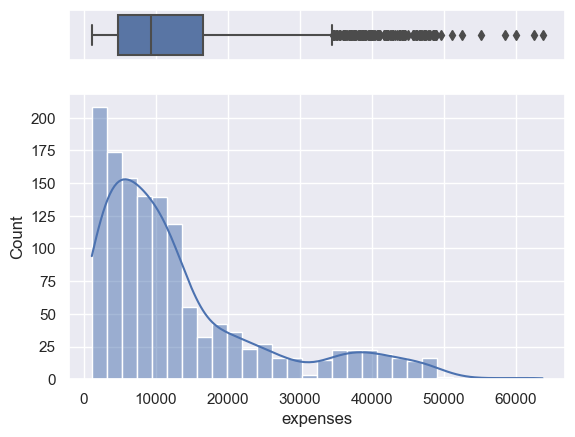

In [68]:
sns.set(style = 'darkgrid')
f, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw = {"height_ratios" : (.15, .85)})
sns.boxplot(data = ins_data, x = "expenses", ax = ax_box)
sns.histplot(data = ins_data, x = "expenses", ax = ax_hist, kde = True)
ax_box.set(xlabel = "")
plt.show()

Data is highly right skewed. We have to transform the data

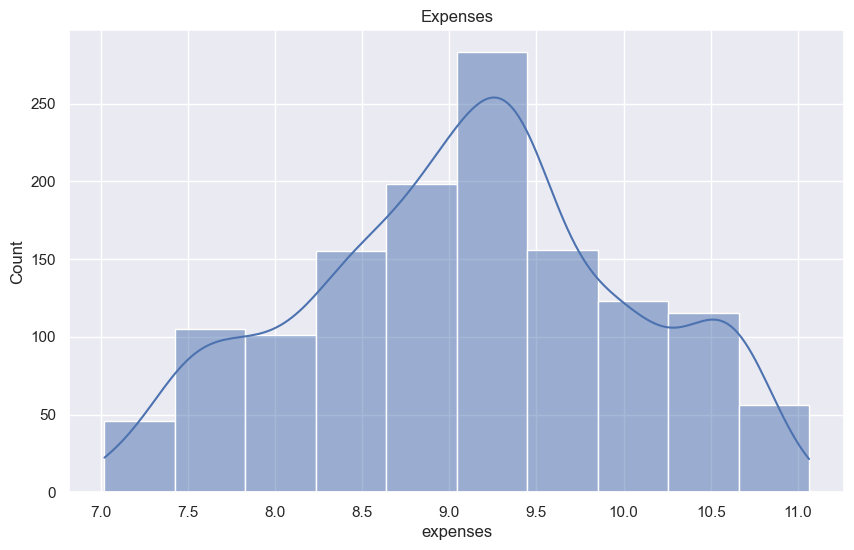

In [69]:
plt.figure(figsize = (10,6))
sns.histplot(np.log(ins_data['expenses']), kde = True, bins = 10)
plt.title("Expenses")
plt.show()

### Checking Normality Using QQ Plot

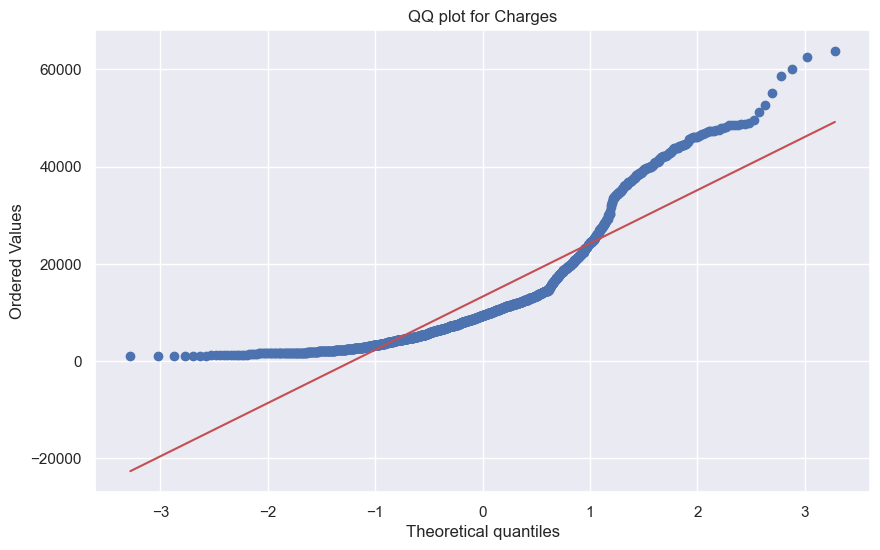

In [72]:
plt.figure(figsize = (10,6))
stats.probplot(ins_data["expenses"], plot = plt, dist = "norm")
plt.title("QQ plot for Charges")
plt.show()